Database schema design

![](<attachment:Altschool Exam schema.png>)
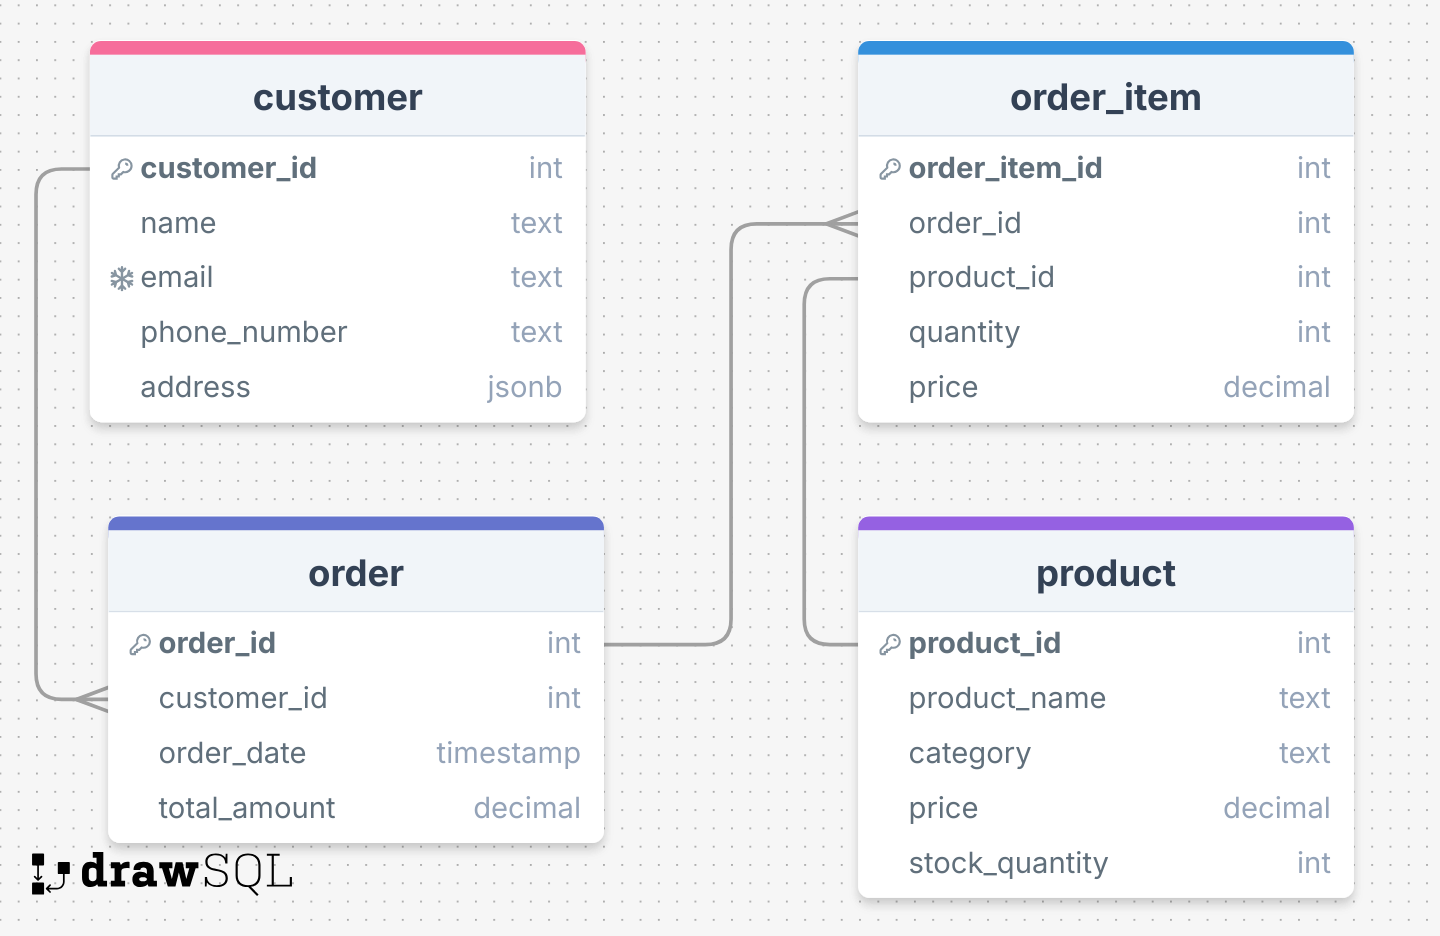

We'll start by importing the modules required to complete this project
* psycopg2 - To create a connection with the database and run SQL scripts
* Faker - To generate fake data for the database
* Random - Used with faker to generate random data

In [1]:
import psycopg2
from faker import Faker
import random
import json
import datetime


Task 1: Database Setup
Create the database and tables using appropriate data types and constraints and populate the table


In [2]:

try:
    conn = psycopg2.connect(
        host = "localhost",
        user = "yinka_admin",
        password = "yinkaadmin",
        dbname = "postgres"
    )
    conn.set_isolation_level(psycopg2.extensions.ISOLATION_LEVEL_AUTOCOMMIT)
    cur = conn.cursor()

    cur.execute("DROP DATABASE IF EXISTS exam_db")
    conn.commit()

    cur.execute(f"CREATE DATABASE exam_db")
    conn.commit()

    print(f"Database exam_db created successfully")

except (Exception, psycopg2.Error) as error:
    print(f"Error while creating database: {error}")

finally:
    if conn:
            cur.close()
            conn.close()
            print("PostgreSQL connection is closed.")



Database exam_db created successfully
PostgreSQL connection is closed.


In [3]:
# Connect to the database you created
try:
    conn = psycopg2.connect(
        host = "localhost",
        user = "yinka_admin",
        password = "yinkaadmin",
        dbname = "exam_db"
    )
    conn.set_isolation_level(psycopg2.extensions.ISOLATION_LEVEL_AUTOCOMMIT)
    cur = conn.cursor()

    cur.execute("CREATE SCHEMA IF NOT EXISTS exam_schema")
    conn.commit()
    print("Exam schema successfully created")


except (Exception, psycopg2.Error) as error:
    print(f"Error while creating schema: {error}")

Exam schema successfully created


In [4]:
# Create customer table
try:
    cur.execute("""
        CREATE TABLE IF NOT EXISTS customers(
                customer_id SERIAL PRIMARY KEY,
                name TEXT NOT NULL,
                email TEXT UNIQUE NOT NULL,
                phone_number TEXT,
                address JSONB)
                """
                )

    # Create product table
    cur.execute("""
                CREATE TABLE IF NOT EXISTS products(
                product_id SERIAL PRIMARY KEY,
                product_name VARCHAR(100) NOT NULL,
                category VARCHAR(100),
                price DECIMAL(10, 2) NOT NULL,
                stock_quantity INT NOT NULL 
                )
                """)

    # Create the orders table
    cur.execute("""
                CREATE TABLE IF NOT EXISTS orders(
                order_id SERIAL PRIMARY KEY,
                customer_id INT NOT NULL, 
                order_date TIMESTAMP NOT NULL,
                total_amount DECIMAL(10, 2) NOT NULL,
                FOREIGN KEY (customer_id) REFERENCES customers (customer_id)
                )
                """)

    # Create the order item table
    cur.execute("""
                CREATE TABLE IF NOT EXISTS order_items(
                order_item_id SERIAL PRIMARY KEY,
                order_id INT NOT NULL,
                product_id INT NOT NULL,
                quantity INT NOT NULL,
                price DECIMAL(10,2) NOT NULL,
                FOREIGN KEY (order_id) REFERENCES orders(order_id),
                FOREIGN KEY (product_id) REFERENCES productS(product_id)
                )
                """)
    
    conn.commit()
    print("Tables created successfully")

except (Exception, psycopg2.Error) as error:
    print(f"Error while creating table {error}")


Tables created successfully


In [5]:
# Populate the tables with data
fake = Faker()

# Generate customer data
cur.execute("TRUNCATE TABLE customers, products, orders, order_items")
print("Tables truncated successfully")

customers = [
        ("John Doe", "john.doe@example.com", "555-1234", '{"Street": "123 Main St", "City": "Anytown", "State": "CA", "PostalCode": "12345"}'),
        ("Jane Smith", "jane.smith@example.com", "555-5678", '{"Street": "456 Oak Ave", "City": "Smallville", "State": "NY", "PostalCode": "56789"}'),
        ("David Lee", "david.lee@example.com", "555-9012", '{"Street": "789 Pine Rd", "City": "Big City", "State": "TX", "PostalCode": "90123"}'),
        ("Sarah Jones", "sarah.jones@example.com", "555-3456", '{"Street": "101 Maple Dr", "City": "Othertown", "State": "FL", "PostalCode": "34567"}'),
        ("Michael Brown", "michael.brown@example.com", "555-7890", '{"Street": "202 Elm St", "City": "Anytown", "State": "CA", "PostalCode": "12345"}'),
        ("Emily Davis", "emily.davis@example.com", "555-2345", '{"Street": "303 Oak Ave", "City": "Smallville", "State": "NY", "PostalCode": "56789"}'),
        ("Daniel White", "daniel.white@example.com", "555-6789", '{"Street": "404 Pine Rd", "City": "Big City", "State": "TX", "PostalCode": "90123"}'),
        ("Amanda Clark", "amanda.clark@example.com", "555-8901", '{"Street": "505 Maple Dr", "City": "Othertown", "State": "FL", "PostalCode": "34567"}'),
        ("Christopher Lee", "christopher.lee@example.com", "555-0123", '{"Street": "606 Elm St", "City": "Anytown", "State": "CA", "PostalCode": "12345"}'),
        ("Melissa Young", "melissa.young@example.com", "555-4567", '{"Street": "707 Oak Ave", "City": "Smallville", "State": "NY", "PostalCode": "56789"}')
    ]
for name, email, phone, address in customers:
    cur.execute("INSERT INTO customers (name, email, phone_number, address) VALUES (%s, %s, %s, %s)", 
                (name, email, phone, address))
conn.commit()

cur.execute("SELECT * FROM customers")
customer_table = cur.fetchall()
for row in customer_table:
     print(row)



Tables truncated successfully
(1, 'John Doe', 'john.doe@example.com', '555-1234', {'City': 'Anytown', 'State': 'CA', 'Street': '123 Main St', 'PostalCode': '12345'})
(2, 'Jane Smith', 'jane.smith@example.com', '555-5678', {'City': 'Smallville', 'State': 'NY', 'Street': '456 Oak Ave', 'PostalCode': '56789'})
(3, 'David Lee', 'david.lee@example.com', '555-9012', {'City': 'Big City', 'State': 'TX', 'Street': '789 Pine Rd', 'PostalCode': '90123'})
(4, 'Sarah Jones', 'sarah.jones@example.com', '555-3456', {'City': 'Othertown', 'State': 'FL', 'Street': '101 Maple Dr', 'PostalCode': '34567'})
(5, 'Michael Brown', 'michael.brown@example.com', '555-7890', {'City': 'Anytown', 'State': 'CA', 'Street': '202 Elm St', 'PostalCode': '12345'})
(6, 'Emily Davis', 'emily.davis@example.com', '555-2345', {'City': 'Smallville', 'State': 'NY', 'Street': '303 Oak Ave', 'PostalCode': '56789'})
(7, 'Daniel White', 'daniel.white@example.com', '555-6789', {'City': 'Big City', 'State': 'TX', 'Street': '404 Pine R

In [6]:
#Generate product data

products = [
        ("Acme Corp", "Electronics", 999.00, 50),
        ("Beta Inc.", "Clothing", 49.99, 20),
        ("Gamma Co.", "Books", 29.95, 100),
        ("Delta Ltd.", "Food", 19.99, 50),
        ("Epsilon Corp.", "Home", 149.00, 30),
        ("Zeta Inc.", "Electronics", 299.00, 75),
        ("Alpha Corp.", "Clothing", 79.99, 40),
        ("Omega Inc.", "Books", 14.95, 150),
        ("Theta Co.", "Food", 9.99, 100),
        ("Lambda Corp.", "Home", 249.00, 25)
    ]
for name, category, price, stock_quantity in products:
        cur.execute("INSERT INTO products (product_name, category, price, stock_quantity) VALUES (%s, %s, %s, %s)", 
                    (name, category, price, stock_quantity))
conn.commit()


cur.execute("SELECT * FROM products")
customer_table = cur.fetchall()
for row in customer_table:
     print(row)

(1, 'Acme Corp', 'Electronics', Decimal('999.00'), 50)
(2, 'Beta Inc.', 'Clothing', Decimal('49.99'), 20)
(3, 'Gamma Co.', 'Books', Decimal('29.95'), 100)
(4, 'Delta Ltd.', 'Food', Decimal('19.99'), 50)
(5, 'Epsilon Corp.', 'Home', Decimal('149.00'), 30)
(6, 'Zeta Inc.', 'Electronics', Decimal('299.00'), 75)
(7, 'Alpha Corp.', 'Clothing', Decimal('79.99'), 40)
(8, 'Omega Inc.', 'Books', Decimal('14.95'), 150)
(9, 'Theta Co.', 'Food', Decimal('9.99'), 100)
(10, 'Lambda Corp.', 'Home', Decimal('249.00'), 25)


In [7]:
# Generate order data

orders = [
        (1, 1234.56, datetime.date(2023, 11, 22)), 
        (3, 456.78, datetime.date(2023, 11, 21)), 
        (2, 987.65, datetime.date(2023, 11, 20)), 
        (5, 234.56, datetime.date(2023, 11, 19)), 
        (4, 678.90, datetime.date(2023, 11, 18)), 
        (1, 1011.22, datetime.date(2023, 11, 17)), 
        (3, 345.67, datetime.date(2023, 11, 16)), 
        (2, 876.54, datetime.date(2023, 11, 15)), 
        (5, 432.10, datetime.date(2023, 11, 14)), 
        (4, 987.65, datetime.date(2023, 11, 13)), 
        (1, 567.89, datetime.date(2023, 11, 12)), 
        (3, 123.45, datetime.date(2023, 11, 11)), 
        (2, 789.01, datetime.date(2023, 11, 10)), 
        (5, 345.67, datetime.date(2023, 11, 9)), 
        (4, 901.23, datetime.date(2023, 11, 8)), 
        (1, 567.89, datetime.date(2023, 11, 7)), 
        (3, 123.45, datetime.date(2023, 11, 6)), 
        (2, 789.01, datetime.date(2023, 11, 5)), 
        (5, 345.67, datetime.date(2023, 11, 4)), 
        (4, 901.23, datetime.date(2023, 11, 3))
    ]
for customer_id, total_amount, order_date in orders:
    cur.execute("INSERT INTO orders (customer_id, total_amount, order_date) VALUES (%s, %s, %s)", 
                (customer_id, total_amount, order_date))
conn.commit()

cur.execute("SELECT * FROM orders")
customer_table = cur.fetchall()
for row in customer_table:
     print(row)

(1, 1, datetime.datetime(2023, 11, 22, 0, 0), Decimal('1234.56'))
(2, 3, datetime.datetime(2023, 11, 21, 0, 0), Decimal('456.78'))
(3, 2, datetime.datetime(2023, 11, 20, 0, 0), Decimal('987.65'))
(4, 5, datetime.datetime(2023, 11, 19, 0, 0), Decimal('234.56'))
(5, 4, datetime.datetime(2023, 11, 18, 0, 0), Decimal('678.90'))
(6, 1, datetime.datetime(2023, 11, 17, 0, 0), Decimal('1011.22'))
(7, 3, datetime.datetime(2023, 11, 16, 0, 0), Decimal('345.67'))
(8, 2, datetime.datetime(2023, 11, 15, 0, 0), Decimal('876.54'))
(9, 5, datetime.datetime(2023, 11, 14, 0, 0), Decimal('432.10'))
(10, 4, datetime.datetime(2023, 11, 13, 0, 0), Decimal('987.65'))
(11, 1, datetime.datetime(2023, 11, 12, 0, 0), Decimal('567.89'))
(12, 3, datetime.datetime(2023, 11, 11, 0, 0), Decimal('123.45'))
(13, 2, datetime.datetime(2023, 11, 10, 0, 0), Decimal('789.01'))
(14, 5, datetime.datetime(2023, 11, 9, 0, 0), Decimal('345.67'))
(15, 4, datetime.datetime(2023, 11, 8, 0, 0), Decimal('901.23'))
(16, 1, datetime.da

In [8]:
# Generate order item data

order_items = [
        (1, 1, 2, 999.00), 
        (1, 1, 1, 29.95), 
        (2, 2, 3, 49.99), 
        (2, 5, 1, 149.00), 
        (3, 1, 1, 999.00), 
        (3, 4, 2, 19.99), 
        (4, 3, 1, 29.95), 
        (4, 2, 1, 49.99), 
        (5, 1, 1, 999.00), 
        (5, 5, 1, 149.00), 
        (6, 1, 2, 999.00), 
        (6, 3, 1, 29.95), 
        (7, 2, 3, 49.99), 
        (7, 5, 1, 149.00), 
        (8, 1, 1, 999.00), 
        (8, 4, 2, 19.99), 
        (9, 3, 1, 29.95), 
        (9, 2, 1, 49.99), 
        (10, 1, 1, 999.00), 
        (10, 5, 1, 149.00), 
        (11, 1, 2, 999.00), 
        (11, 1, 1, 29.95), 
        (12, 2, 3, 49.99), 
        (12, 5, 1, 149.00), 
        (13, 1, 1, 999.00), 
        (13, 4, 2, 19.99), 
        (14, 3, 1, 29.95), 
        (14, 2, 1, 49.99), 
        (15, 1, 1, 999.00), 
        (15, 5, 1, 149.00), 
        (16, 1, 2, 999.00), 
        (16, 3, 1, 29.95), 
        (17, 2, 3, 49.99), 
        (17, 5, 1, 149.00), 
        (18, 1, 1, 999.00), 
        (18, 4, 2, 19.99), 
        (19, 3, 1, 29.95), 
        (19, 2, 1, 49.99), 
        (20, 1, 1, 999.00), 
        (20, 5, 1, 149.00), 
        (1, 1, 2, 999.00), 
        (1, 1, 1, 29.95), 
        (2, 2, 3, 49.99), 
        (2, 5, 1, 149.00), 
        (3, 1, 1, 999.00), 
        (3, 4, 2, 19.99), 
        (4, 3, 1, 29.95), 
        (4, 2, 1, 49.99), 
        (5, 1, 1, 999.00), 
        (5, 5, 1, 149.00) 
    ]
for order_id, product_id, quantity, price in order_items:
    cur.execute("INSERT INTO order_items (order_id, product_id, quantity, price) VALUES (%s, %s, %s, %s)", 
                (order_id, product_id, quantity, price))

conn.commit()

cur.execute("SELECT * FROM orders")
customer_table = cur.fetchall()
for row in customer_table:
     print(row)

print("All Table data generated successfully.")

(1, 1, datetime.datetime(2023, 11, 22, 0, 0), Decimal('1234.56'))
(2, 3, datetime.datetime(2023, 11, 21, 0, 0), Decimal('456.78'))
(3, 2, datetime.datetime(2023, 11, 20, 0, 0), Decimal('987.65'))
(4, 5, datetime.datetime(2023, 11, 19, 0, 0), Decimal('234.56'))
(5, 4, datetime.datetime(2023, 11, 18, 0, 0), Decimal('678.90'))
(6, 1, datetime.datetime(2023, 11, 17, 0, 0), Decimal('1011.22'))
(7, 3, datetime.datetime(2023, 11, 16, 0, 0), Decimal('345.67'))
(8, 2, datetime.datetime(2023, 11, 15, 0, 0), Decimal('876.54'))
(9, 5, datetime.datetime(2023, 11, 14, 0, 0), Decimal('432.10'))
(10, 4, datetime.datetime(2023, 11, 13, 0, 0), Decimal('987.65'))
(11, 1, datetime.datetime(2023, 11, 12, 0, 0), Decimal('567.89'))
(12, 3, datetime.datetime(2023, 11, 11, 0, 0), Decimal('123.45'))
(13, 2, datetime.datetime(2023, 11, 10, 0, 0), Decimal('789.01'))
(14, 5, datetime.datetime(2023, 11, 9, 0, 0), Decimal('345.67'))
(15, 4, datetime.datetime(2023, 11, 8, 0, 0), Decimal('901.23'))
(16, 1, datetime.da

Task 2 - CRUD Operations

In [9]:
# 1. Add a new customer to the database.
try:
    cur.execute("INSERT INTO customers (name, email, phone_number, address) VALUES (%s, %s, %s, %s)", 
                    ("Adeyinka", "owodunniadeyik@gmail.com", +2341023456, json.dumps({"Street": "50 Wiga", "City": "Mushin", "State": "Lagos", "PostalCode": "1200071"})))
    print("Data inserted successfully")

    conn.commit()

except (Exception, psycopg2.Error) as error:
    print(f"Error while inserting data {error}")



Data inserted successfully


In [10]:
# 2. Update the stock quantity of a product after a purchase.
try:
    cur.execute("""
                UPDATE products
                SET stock_quantity = 50
                WHERE product_id = 6
""")
    
    conn.commit()
    print("Data Updated successfully")

except (Exception, psycopg2.Error) as error:
    print(f"Error while updating data {error}")



Data Updated successfully


In [11]:
# 3. Delete an order from the database.

try:
    cur.execute("DELETE FROM order_items WHERE order_id = 5")
    conn.commit()
    cur.execute("""
                DELETE FROM orders
                WHERE order_id = 5
""")
    conn.commit()
    print("Data deleted successfully")

except (Exception, psycopg2.Error) as error:
    print(f"Error while deleting data {error}")


Data deleted successfully


In [12]:
# 4. Retrieve all orders made by a specific customer.
try:
    cur.execute("""
        SELECT o.order_id, o.order_date, o.total_amount 
        FROM orders o
        JOIN customers c ON o.customer_id = c.customer_id
        WHERE c.customer_id = 4;
""")
    print("Data retrieved successfully")
    orders = cur.fetchall()
    for rows in orders:
        print(orders)

except (Exception, psycopg2.Error) as error:
    print(f"Error while retrieving data {error}")


Data retrieved successfully
[(10, datetime.datetime(2023, 11, 13, 0, 0), Decimal('987.65')), (15, datetime.datetime(2023, 11, 8, 0, 0), Decimal('901.23')), (20, datetime.datetime(2023, 11, 3, 0, 0), Decimal('901.23'))]
[(10, datetime.datetime(2023, 11, 13, 0, 0), Decimal('987.65')), (15, datetime.datetime(2023, 11, 8, 0, 0), Decimal('901.23')), (20, datetime.datetime(2023, 11, 3, 0, 0), Decimal('901.23'))]
[(10, datetime.datetime(2023, 11, 13, 0, 0), Decimal('987.65')), (15, datetime.datetime(2023, 11, 8, 0, 0), Decimal('901.23')), (20, datetime.datetime(2023, 11, 3, 0, 0), Decimal('901.23'))]


Task 3 - Analytical Queries

In [13]:
# 1. Revenue Analysis
# Calculate the total revenue generated by the e-commerce platform.
try:
    cur.execute("""
        SELECT SUM(total_amount) AS total_revenue FROM orders
""")
    print("Data retrieved successfully")
    rows = cur.fetchall()
    for row in rows:
        print(row)

except (Exception, psycopg2.Error) as error:
    print(f"Error while retrieving data {error}")

Data retrieved successfully
(Decimal('12021.23'),)


In [14]:
# Find the revenue generated per product.
try:
    cur.execute("""
                SELECT p.product_name, SUM(ordi.quantity * ordi.price) AS product_revenue
                FROM products p
                JOIN order_items ordi ON p.product_id = ordi.product_id
                GROUP BY p.product_name;
""")
    print("Data retrieved successfully")
    rows = cur.fetchall()
    for row in rows:
        print(row)

except (Exception, psycopg2.Error) as error:
    print(f"Error while retrieving data {error}")

Data retrieved successfully
('Epsilon Corp.', Decimal('1192.00'))
('Gamma Co.', Decimal('209.65'))
('Acme Corp', Decimal('18071.85'))
('Delta Ltd.', Decimal('199.90'))
('Beta Inc.', Decimal('999.80'))


In [15]:
# 2. Customer Insights
# List the top 5 customers by total spending.
try:
    cur.execute("""
                SELECT c.customer_id, c.name, SUM(ord.total_amount) AS total_spending
                FROM customers c
                JOIN orders ord ON c.customer_id = ord.customer_id
                GROUP BY c.customer_id, c.name
                ORDER BY total_spending DESC
                LIMIT 5;
""")
    print("Data retrieved successfully")
    rows = cur.fetchall()
    for row in rows:
        print(row)

except (Exception, psycopg2.Error) as error:
    print(f"Error while retrieving data {error}")

Data retrieved successfully
(2, 'Jane Smith', Decimal('3442.21'))
(1, 'John Doe', Decimal('3381.56'))
(4, 'Sarah Jones', Decimal('2790.11'))
(5, 'Michael Brown', Decimal('1358.00'))
(3, 'David Lee', Decimal('1049.35'))


In [16]:
# Identify customers who haven’t made any purchases.
try:
    cur.execute("""
                SELECT c.customer_id, c.name
                FROM customers c
                LEFT JOIN orders ord ON c.customer_id = ord.customer_id
                WHERE ord.order_id IS NULL;
""")
    print("Data retrieved successfully")
    rows = cur.fetchall()
    for row in rows:
        print(row)

except (Exception, psycopg2.Error) as error:
    print(f"Error while retrieving data {error}")

Data retrieved successfully
(11, 'Adeyinka')
(10, 'Melissa Young')
(8, 'Amanda Clark')
(6, 'Emily Davis')
(9, 'Christopher Lee')
(7, 'Daniel White')


In [17]:
# 3. Product Trends:
# Find the top 3 best-selling products.
try:
    cur.execute("""
                SELECT p.product_name, SUM(oi.quantity) AS total_quantity_sold
                FROM products p
                JOIN order_items oi ON p.product_id = oi.product_id
                GROUP BY p.product_name
                ORDER BY total_quantity_sold DESC
                LIMIT 3
""")
    print("Data retrieved successfully")
    rows = cur.fetchall()
    for row in rows:
        print(row)

except (Exception, psycopg2.Error) as error:
    print(f"Error while retrieving data {error}")

Data retrieved successfully
('Acme Corp', 21)
('Beta Inc.', 20)
('Delta Ltd.', 10)


In [18]:
# 3. Product Trends:
# Identify products that are out of stock.
try:
    cur.execute("""
                SELECT *
                FROM products
                WHERE stock_quantity = 0;
""")
    print("Data retrieved successfully")
    rows = cur.fetchall()
    for row in rows:
        print(row)

except (Exception, psycopg2.Error) as error:
    print(f"Error while retrieving data {error}")

Data retrieved successfully


In [19]:
# 4. Order Details:
# Retrieve all items in a specific order, including product names, quantities, and prices.
try:
    cur.execute("""
                SELECT ordi.quantity, ordi.price, p.product_name
                FROM order_items ordi
                JOIN products p ON ordi.product_id = p.product_id
                WHERE ordi.order_id = 7;
""")
    print("Data retrieved successfully")
    rows = cur.fetchall()
    for row in rows:
        print(row)

except (Exception, psycopg2.Error) as error:
    print(f"Error while retrieving data {error}")

Data retrieved successfully
(3, Decimal('49.99'), 'Beta Inc.')
(1, Decimal('149.00'), 'Epsilon Corp.')


In [20]:
# 4. Order Details:
# Calculate the total amount of an order.
try:
    cur.execute("""
                SELECT SUM(ordi.quantity * ordi.price) AS order_total
                FROM order_items ordi
                WHERE ordi.order_id = 8
""")
    print("Data retrieved successfully")
    rows = cur.fetchall()
    for row in rows:
        print(row)

except (Exception, psycopg2.Error) as error:
    print(f"Error while retrieving data {error}")

Data retrieved successfully
(Decimal('1038.98'),)


In [21]:
# 5. Monthly Trends:
# Calculate the number of orders and total revenue for each month.
try:
    cur.execute("""
                SELECT EXTRACT(MONTH FROM ord.order_date) AS month, 
                COUNT(DISTINCT ord.order_id) AS order_count, 
                SUM(ord.total_amount) AS monthly_revenue
                FROM orders ord
                GROUP BY month
                ORDER BY month
""")
    print("Data retrieve successfully")
    rows = cur.fetchall()
    for row in rows:
        print(row)

except (Exception, psycopg2.Error) as error:
    print(f"Error while retrieving data {error}")

Data retrieve successfully
(Decimal('11'), 19, Decimal('12021.23'))


Task 4 - Advanced SQL

In [22]:
#Write queries using INNER Join
try:
    cur.execute("""
                SELECT c.name, ord.order_id, ord.total_amount
                FROM customers c
                INNER JOIN orders ord ON c.customer_id = ord.customer_id;
""")
    print("Data retrieve successfully")
    rows = cur.fetchall()
    for row in rows:
        print(row)

except (Exception, psycopg2.Error) as error:
    print(f"Error while retrieving data {error}")

Data retrieve successfully
('John Doe', 1, Decimal('1234.56'))
('David Lee', 2, Decimal('456.78'))
('Jane Smith', 3, Decimal('987.65'))
('Michael Brown', 4, Decimal('234.56'))
('John Doe', 6, Decimal('1011.22'))
('David Lee', 7, Decimal('345.67'))
('Jane Smith', 8, Decimal('876.54'))
('Michael Brown', 9, Decimal('432.10'))
('Sarah Jones', 10, Decimal('987.65'))
('John Doe', 11, Decimal('567.89'))
('David Lee', 12, Decimal('123.45'))
('Jane Smith', 13, Decimal('789.01'))
('Michael Brown', 14, Decimal('345.67'))
('Sarah Jones', 15, Decimal('901.23'))
('John Doe', 16, Decimal('567.89'))
('David Lee', 17, Decimal('123.45'))
('Jane Smith', 18, Decimal('789.01'))
('Michael Brown', 19, Decimal('345.67'))
('Sarah Jones', 20, Decimal('901.23'))


In [23]:
#Write queries using LEFT Join
try:
    cur.execute("""
                SELECT c.name, ord.order_id, ord.total_amount
                FROM customers c
                LEFT JOIN orders ord ON c.customer_id = ord.customer_id;
""")
    print("Data retrieve successfully")
    rows = cur.fetchall()
    for row in rows:
        print(row)

except (Exception, psycopg2.Error) as error:
    print(f"Error while retrieving data {error}")

Data retrieve successfully
('John Doe', 1, Decimal('1234.56'))
('David Lee', 2, Decimal('456.78'))
('Jane Smith', 3, Decimal('987.65'))
('Michael Brown', 4, Decimal('234.56'))
('John Doe', 6, Decimal('1011.22'))
('David Lee', 7, Decimal('345.67'))
('Jane Smith', 8, Decimal('876.54'))
('Michael Brown', 9, Decimal('432.10'))
('Sarah Jones', 10, Decimal('987.65'))
('John Doe', 11, Decimal('567.89'))
('David Lee', 12, Decimal('123.45'))
('Jane Smith', 13, Decimal('789.01'))
('Michael Brown', 14, Decimal('345.67'))
('Sarah Jones', 15, Decimal('901.23'))
('John Doe', 16, Decimal('567.89'))
('David Lee', 17, Decimal('123.45'))
('Jane Smith', 18, Decimal('789.01'))
('Michael Brown', 19, Decimal('345.67'))
('Sarah Jones', 20, Decimal('901.23'))
('Adeyinka', None, None)
('Melissa Young', None, None)
('Amanda Clark', None, None)
('Emily Davis', None, None)
('Christopher Lee', None, None)
('Daniel White', None, None)


In [24]:
#Write queries using FULL Join
try:
    cur.execute("""
                SELECT c.name, ord.order_id, ord.total_amount
                FROM customers c
                FULL JOIN orders ord ON c.customer_id = ord.customer_id;
""")
    print("Data retrieve successfully")
    rows = cur.fetchall()
    for row in rows:
        print(row)

except (Exception, psycopg2.Error) as error:
    print(f"Error while retrieving data {error}")

Data retrieve successfully
('John Doe', 1, Decimal('1234.56'))
('David Lee', 2, Decimal('456.78'))
('Jane Smith', 3, Decimal('987.65'))
('Michael Brown', 4, Decimal('234.56'))
('John Doe', 6, Decimal('1011.22'))
('David Lee', 7, Decimal('345.67'))
('Jane Smith', 8, Decimal('876.54'))
('Michael Brown', 9, Decimal('432.10'))
('Sarah Jones', 10, Decimal('987.65'))
('John Doe', 11, Decimal('567.89'))
('David Lee', 12, Decimal('123.45'))
('Jane Smith', 13, Decimal('789.01'))
('Michael Brown', 14, Decimal('345.67'))
('Sarah Jones', 15, Decimal('901.23'))
('John Doe', 16, Decimal('567.89'))
('David Lee', 17, Decimal('123.45'))
('Jane Smith', 18, Decimal('789.01'))
('Michael Brown', 19, Decimal('345.67'))
('Sarah Jones', 20, Decimal('901.23'))
('Adeyinka', None, None)
('Melissa Young', None, None)
('Amanda Clark', None, None)
('Emily Davis', None, None)
('Christopher Lee', None, None)
('Daniel White', None, None)


In [25]:
# Rank customers based on total spending
try:
    cur.execute("""
                SELECT c.name, SUM(ord.total_amount) AS total_spent,
                RANK() OVER (ORDER BY SUM(ord.total_amount) DESC) AS rank
                FROM customers c
                JOIN orders ord ON c.customer_id = ord.customer_id
                GROUP BY c.name
                """)
    print("Data retrieve successfully")
    rows = cur.fetchall()
    for row in rows:
        print(row)

except (Exception, psycopg2.Error) as error:
    print(f"Error while retrieving data {error}")

Data retrieve successfully
('Jane Smith', Decimal('3442.21'), 1)
('John Doe', Decimal('3381.56'), 2)
('Sarah Jones', Decimal('2790.11'), 3)
('Michael Brown', Decimal('1358.00'), 4)
('David Lee', Decimal('1049.35'), 5)


In [26]:
# Assign a unique number to each order for a customer
try:
    cur.execute("""
                SELECT ord.customer_id, ord.order_id, 
                ROW_NUMBER() OVER (PARTITION BY ord.customer_id ORDER BY ord.order_date) AS order_number
                FROM orders ord;
                """)
    print("Data retrieve successfully")
    rows = cur.fetchall()
    for row in rows:
        print(row)

except (Exception, psycopg2.Error) as error:
    print(f"Error while retrieving data {error}")

Data retrieve successfully
(1, 16, 1)
(1, 11, 2)
(1, 6, 3)
(1, 1, 4)
(2, 18, 1)
(2, 13, 2)
(2, 8, 3)
(2, 3, 4)
(3, 17, 1)
(3, 12, 2)
(3, 7, 3)
(3, 2, 4)
(4, 20, 1)
(4, 15, 2)
(4, 10, 3)
(5, 19, 1)
(5, 14, 2)
(5, 9, 3)
(5, 4, 4)


In [27]:
# CTE to calculate total revenue per customer and find customers with revenue > $500

try:
    cur.execute("""
                WITH RevenuePerCustomer AS (
                SELECT c.customer_id, c.name, SUM(ord.total_amount) AS total_spent
                FROM customers c
                JOIN orders ord ON c.customer_id = ord.customer_id
                GROUP BY c.customer_id, c.name
                )
                SELECT name, total_spent
                FROM RevenuePerCustomer
                WHERE total_spent > 500;
                """)
    print("Data retrieve successfully")
    rows = cur.fetchall()
    for row in rows:
        print(row)

except (Exception, psycopg2.Error) as error:
    print(f"Error while retrieving data {error}")

Data retrieve successfully
('Sarah Jones', Decimal('2790.11'))
('Jane Smith', Decimal('3442.21'))
('David Lee', Decimal('1049.35'))
('Michael Brown', Decimal('1358.00'))
('John Doe', Decimal('3381.56'))


In [28]:
# Subquery to find the product with the highest price

try:
    cur.execute("""
                SELECT product_name, price
                FROM products
                WHERE price = (SELECT MAX(price) FROM products);
                """)
    print("Data retrieve successfully")
    rows = cur.fetchall()
    for row in rows:
        print(row)

except (Exception, psycopg2.Error) as error:
    print(f"Error while retrieving data {error}")

Data retrieve successfully
('Acme Corp', Decimal('999.00'))


In [29]:
# Create indexes on frequently queried fields
try:
    cur.execute("""
                CREATE INDEX idx_customer_id ON orders(customer_id);
                CREATE INDEX idx_product_id ON order_items(product_id);
                """)
    print("Data retrieve successfully")
    rows = cur.fetchall()
    for row in rows:
        print(row)

except (Exception, psycopg2.Error) as error:
    print(f"Error while retrieving data {error}")

Data retrieve successfully
Error while retrieving data no results to fetch


In [30]:






--Subquery to find the product with the highest price

--Indexing
--Create indexes on frequently queried fields


SyntaxError: invalid syntax (4141123386.py, line 1)